# Regresión

Vamos a trabajar con un dataset sobre precios de casas en boston:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [221]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [223]:
df.shape

(506, 14)

¿ Hay nulos ?

In [224]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

Imprimir descripción del dataset:

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


¿ Hay variables correlacionadas entre sí ?

<AxesSubplot:>

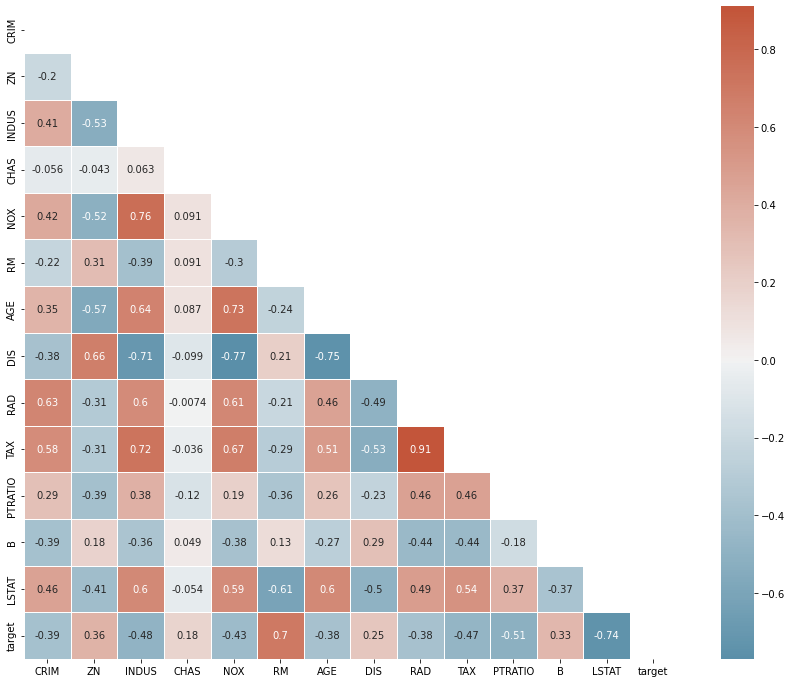

In [226]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot= True)

En OLS no es bueno poner variables que esten correlacionadas entre sí.

Por lo tanto, descartemos las variables que tienen una alta correlación (más de 0.9) y nos quedemos con 1 sola de ellas:

In [227]:
df.drop("RAD", axis=1, inplace=True)

¿ Cómo se distribuye nuestro target ?

<AxesSubplot:xlabel='target', ylabel='Count'>

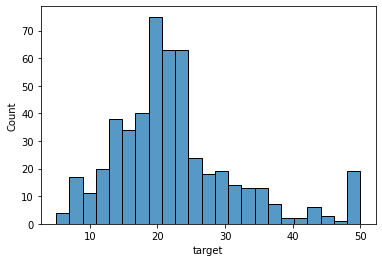

In [228]:
sns.histplot(df["target"])

# Train - Test split

Ahora, vamos a comenzar entrenando un modelo de regresión lineal de sklearn. Primero que nada, separemos en train - test.

Dejemos un 20% de los datos reservados para test y un random_state=42 para obtener todos los mismos resultados:

In [229]:
X = df.drop("target", axis=1)
y = df["target"]

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Linear regression

Comenzaremos implementando una regresión lineal simple, utilizando Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

En principio seleccionemos 1 sola variable como feature (puede ser por ejemplo, la que tenía la correlación más fuerte con el target)

In [231]:
X_train_1 = X_train[["RM"]].copy()
X_test_1 = X_test[["RM"]].copy()

Importamos LinearRegression

In [232]:
from sklearn.linear_model import LinearRegression

Entrenamos el modelo:

In [233]:
reg = LinearRegression().fit(X_train_1, y_train)

Y validamos su score en train y en test (si se fijan en la documentación, el LinearRegression ya trae un método para calcular el score)

In [234]:
reg.score(X_train_1, y_train)

0.5050658352776293

In [235]:
reg.score(X_test_1, y_test)

0.3707569232254778

Al trabajar con una única feature, podemos graficar.

Graficar un scatterplot que contenga:
- Puntos para los datos de entrenamiento (X_test, y_test)
- Puntos para los datos de test en otro color (Usar hue)
- Una linea con la regresión (predicciones que genera nuestro modelo) en train
- Misma linea pero para test

Para esto, van a necesitar guardar las predicciones (su "y_test_pred" y "y_train_pred") en 2 listas:

In [236]:
y_train_pred = reg.predict(X_train_1)
y_test_pred = reg.predict(X_test_1)

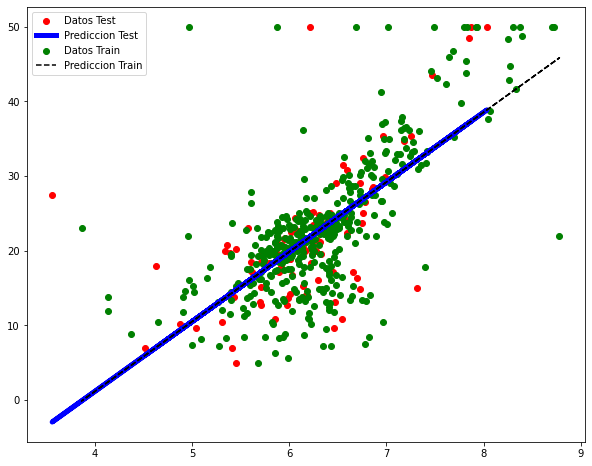

In [237]:
plt.figure(figsize = (10,8))
plt.scatter(X_test_1, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test_1, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.scatter(X_train_1, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train_1, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.legend()

Ahora, agreguemos una feature más al modelo y hagamos lo mismo:

In [238]:
X_train_2 = X_train[["RM", "LSTAT"]].copy()
X_test_2 = X_test[["RM", "LSTAT"]].copy()

In [239]:
reg = LinearRegression().fit(X_train_2, y_train)

In [240]:
reg.score(X_train_2, y_train)

0.6501592679428922

In [241]:
reg.score(X_test_2, y_test)

0.5739577415025859

Vemos que ya empieza a haber una diferencia significativa en los scores entre train y test. Por último, agreguemos todas las features y midamos los R squared:

In [242]:
reg = LinearRegression().fit(X_train, y_train)

In [243]:
reg.score(X_train, y_train)

0.7432668146680894

In [244]:
reg.score(X_test, y_test)

0.6390347738951423

Vemos que nuestro modelo se ajusta bastante mejor a los datos de train que de test. 

Si vemos en la documentación, hay 2 atributos que nos pueden interesar:

- coef_
- intercept_

¿ Qué significan cada uno ?

Imprimirlos

In [245]:
reg.coef_

array([-8.13528576e-02,  2.20901901e-02, -1.49860929e-02,  3.12973863e+00,
       -1.55478394e+01,  4.72661372e+00, -9.59697735e-03, -1.42851306e+00,
        9.65690007e-04, -8.15257437e-01,  1.16253689e-02, -4.96644948e-01])

In [246]:
reg.intercept_

24.260870103153415

Medir el mean squared error (Sklearn tiene la implementacion)

In [247]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, reg.predict(X_train))

22.303285686660598

In [248]:
mean_squared_error(y_test, reg.predict(X_test))

26.47094561959058

# Árboles de decision

Ahora, vamos a tratar de hacer lo mismo pero utilizando árboles de decision.

Vimos que sklearn tiene una implementación para esto: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Importar el decision tree regressor:

In [249]:
from sklearn.tree import DecisionTreeRegressor

Vamos a hacer lo mismo que la clase pasada: Armar un listado de max_depths, entrenarlo y generar predicciones para cada elemento de la lista y decidir cuál es el mejor valor para max_depth.

En este caso, en lugar de medir el fscore, mediremos el MSE (mean squared error) para comparar con los resultados obtenidos en la regresión lineal

In [250]:
max_depths = np.arange(1,15)

In [251]:
train_scores = []
test_scores = []

for i in max_depths:
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(X_train, y_train)
    train_scores.append(mean_squared_error(y_train, tree.predict(X_train)))
    test_scores.append(mean_squared_error(y_test, tree.predict(X_test)))


C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

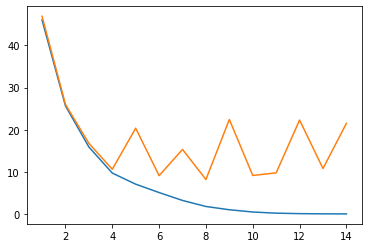

In [252]:
sns.lineplot(max_depths, train_scores)
sns.lineplot(max_depths, test_scores)

Vemos como el error va disminuyendo a medida que aumenta el max depth, pero a partir de la profundidad 5, se separan ambas lineas (comienza a overfittear) por lo que avanzaremos con un max_depth=5.

Entrenar el árbol con max_depth=5 y medir el mean_squared_error:

In [253]:
tree = DecisionTreeRegressor(max_depth=5)

In [254]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [255]:
mean_squared_error(y_train, tree.predict(X_train))

7.078696760120875

In [256]:
mean_squared_error(y_test, tree.predict(X_test))

8.553906584646843

Vemos como podemos obtener mucho mejores resultados con un simple árbol de decisión.

# KNN

Ahora, probemos KNN.

Vimos que KNN se puede utilizar para regresión y lo que hace es tomar una media ponderada de los vecinos más cercanos.

Importemos knn regressor de sklearn:

In [257]:
from sklearn.neighbors import KNeighborsRegressor

Recuerden que en KNN, es importante escalar los datos. Por lo tanto, vamos a escalar X_train y X_test con un standard scaler.

Escalar los datos:

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
scaler = StandardScaler()

In [260]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Ahora, vamos a entrenar el modelo con distintos valores de K, al igual que hicimos con la profundidad de los arboles.

Entrenar knn con k desde 1 hasta 20 y decidir cuál es el mejor valor:

In [261]:
ks = np.arange(1,20)

train_scores = []
test_scores = []

for i in ks:
    kreg = KNeighborsRegressor(n_neighbors=i, weights="uniform")
    kreg.fit(X_train, y_train)
    train_scores.append(mean_squared_error(y_train, kreg.predict(X_train)))
    test_scores.append(mean_squared_error(y_test, kreg.predict(X_test)))

C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tmk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

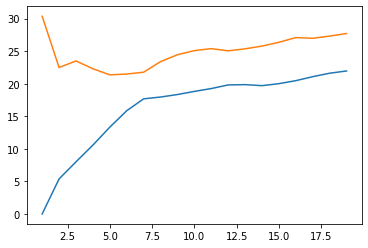

In [262]:
sns.lineplot(ks, train_scores)
sns.lineplot(ks, test_scores)

Observando el gráfico, decidir el mejor valor de K y volver a entrenar knn.

Luego, medir el MSE y comparar con los modelos anteriores:

In [263]:
kreg = KNeighborsRegressor(n_neighbors=7, weights="uniform")
kreg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [264]:
mean_squared_error(y_train, kreg.predict(X_train))

17.676533138007677

In [265]:
mean_squared_error(y_test, kreg.predict(X_test))

21.764771908763507

¿ Conclusiones ?